# A Beamline with solenoids

The first example in coolpy demonstrates the construction of solenoids. The beamline will contain only solenoids, with no other beam-optical elements. Finally, the field-line elements of the solenoid system will be illustrated.

## Requirements and Installation

Make sure you are using a Python version higher than **3.8**. The author uses **Python 3.10**.

To install the package, run:

```pip install coolpy```

If you want to install **coolpy** for a specific Python version, use:
This example shows the command for **Python 3.10**:
```python3.10 -m install coolpy```




In [1]:
import coolpy as cp
import matplotlib.pyplot as plt
import numpy as np

## Multiple current sheets

<figure>
  <img src="Sheets.png" width="300">
  <figcaption>
    In practice, a solenoid has a finite thickness $t$. To model this using current sheets, the solenoid is divided into an arbitrary number of coaxial rings, each with thickness $dt$. Each ring carries the same current density,
$$
    dJ = \frac{J}{N_{\text{Sheets}}}
$$
     where the total current density of the solenoid is
$$
    J = \frac{I}{r_{\text{out}} - r_{\text{in}}}.
$$
    Here, $r_{\text{out}}$ and $r_{\text{in}}$ are the outer and inner radii of the solenoid, and the thickness is $t=r_{\text{out}} - r_{\text{in}}$, while $L$ is the axial size of the solenoid.The total magnetic field is obtained by summing the contributions from all $N_{\text{Sheets}}$ current sheets. As the number of sheets increases, this model converges to a realistic solenoid field.
  </figcaption>
</figure>

## Creat a solenoid with coolpy

In ```coolpy```, six parameters are required to construct a solenoid element. The magnetic field of a solenoid is cylindrically symmetric. The parameter ```rho``` specifies the radial offset from the beam axis at which the field is evaluated. The other parameters were introduced above.

In [2]:
N_Sheet = 10 #number of current sheets
r_in = 0.1 #Inner solenoid radius [m] 
r_out = 0.3 #Outer solenoid radius [m] 
L = 1. #axial solenoid length [m] 
rho = 0.0 #Radial position [m], rho=0 is on axis
J = 17.0 #Current density [A/mm^2]

We construct our test solenoid by calling the function ```SolenoidSheet``` from coolpy ```coolpy``` at a specific test positon in the 3D space:

In [3]:
test_position = 0.
test_solenoid = cp.SolenoidSheet(
    current_density = J, 
    radius_inner = r_in , 
    radius_outer = r_out, 
    rho = rho, 
    L_sol = L, 
    nSheet = N_Sheet, 
    position = test_position)

The longitudinal and radial magnetic field components are calculated by instantiating a ```MagneticField``` object and adding a solenoid configuration (```test_solenoid```).
Once added, the magnetic field can be evaluated at any position along the beam line.

In [4]:
mag_field = cp.MagneticField()
mag_field.add_solenoid(test_solenoid)

The magnetic field strengths over a specific length $s$ in the beamline are calucalted by ```mag_field.superposed_field_z(s)``` and ```mag_field.superposed_field_r(s)```

In [5]:
s = np.linspace(-1.5,1.5, 101)
Bz_onAxis = mag_field.superposed_field_z(s)
Br_onAxis = mag_field.superposed_field_r(s)

The field can be easily also evaluated off-axis:

In [6]:
rho_off = 0.09 #9cm off the solenoid axis
test_solenoid.rho = rho_off

Bz_offAxis = mag_field.superposed_field_z(s)
Br_offAxis = mag_field.superposed_field_r(s)

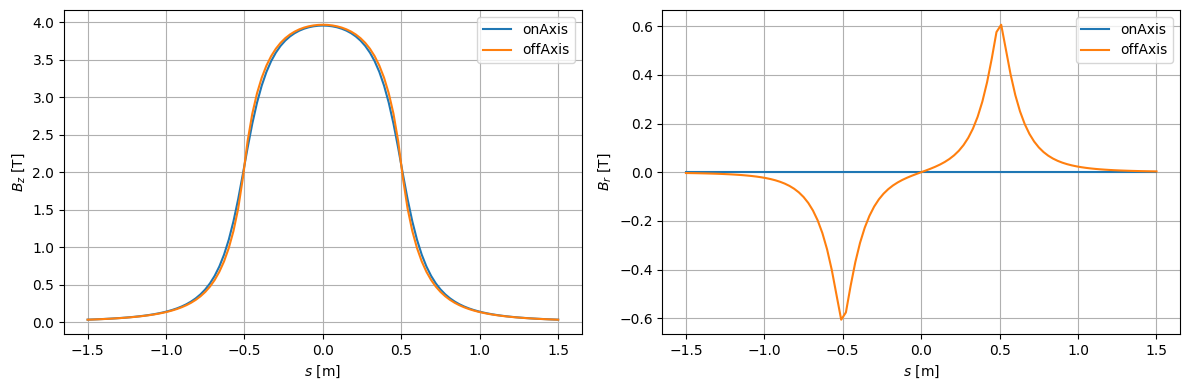

In [7]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(s, Bz_onAxis, label='onAxis')
plt.plot(s, Bz_offAxis, label='offAxis')
plt.xlabel(r'$s$ [m]')
plt.ylabel(r'$B_z$ [T]')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.plot(s, Br_onAxis, label='onAxis')
plt.plot(s, Br_offAxis, label='offAxis')
plt.xlabel(r'$s$ [m]')
plt.ylabel(r'$B_r$ [T]')
plt.grid(True)
plt.legend()

plt.tight_layout()

## Multiple solenoid beam line

As an example, we construct a beamline consisting of three ```test_solenoid elements```, each placed at a different longitudinal position.

In [8]:
rho=onAxis = 0 #field calculation on axis
position1, position2, position3 = 0.5, 2, 3.5

Solenoid1 = cp.SolenoidSheet(current_density = J, radius_inner = r_in , radius_outer = r_out, rho = rho, L_sol = L, nSheet = N_Sheet, position = position1)
Solenoid2 = cp.SolenoidSheet(current_density = J, radius_inner = r_in , radius_outer = r_out, rho = rho, L_sol = L, nSheet = N_Sheet, position = position2)
Solenoid3 = cp.SolenoidSheet(current_density = J, radius_inner = r_in , radius_outer = r_out, rho = rho, L_sol = L, nSheet = N_Sheet, position = position3)

#beamline as list of solenoids 
solenoid_list = [Solenoid1, Solenoid2, Solenoid3]
#create object
mag_field_beamline = cp.MagneticField()
[mag_field_beamline.add_solenoid(solenoid) for solenoid in solenoid_list]

[None, None, None]

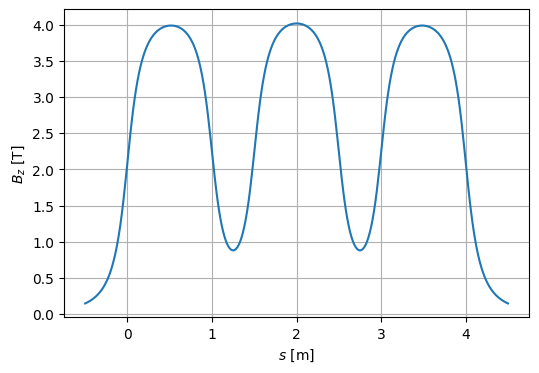

In [9]:
s = np.linspace( -0.5, 4.5, 301)
Bz_beamline_onAxis = mag_field_beamline.superposed_field_z(s)

plt.figure(figsize=(6, 4))
plt.plot(s, Bz_beamline_onAxis )
plt.xlabel(r'$s$ [m]')
plt.ylabel(r'$B_z$ [T]')
plt.grid(True)

The parameters of each individual solenoid element in the beamlind can be changened. For example the current density of the third solenoid.

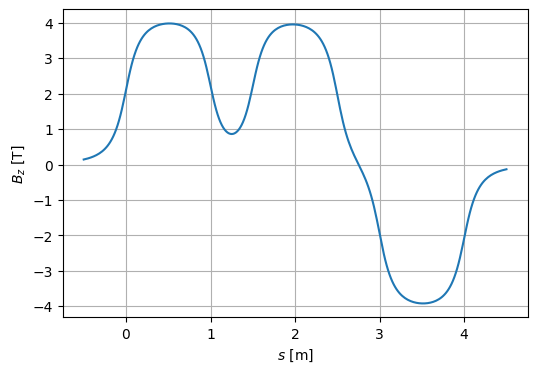

In [10]:
Solenoid3.current_density = -J 
Bz_beamline_onAxis = mag_field_beamline.superposed_field_z(s)

plt.figure(figsize=(6, 4))
plt.plot(s, Bz_beamline_onAxis )
plt.xlabel(r'$s$ [m]')
plt.ylabel(r'$B_z$ [T]')
plt.grid(True)

## 3D field of solenoid

Thhe magnetic field can be evaluated over a range of ```rho``` values. In addition, the field must be transformed from cylindrical to Cartesian coordinates.

In [11]:
rho_ = np.linspace(-0.4, 0.4, 51 )

Bz = np.zeros( (len(rho_), len(s)) )
Bx =  np.zeros( (len(rho_), len(s)) )
By = np.zeros( (len(rho_), len(s)) )
phi = np.pi * (0) #zx-plane 

cos_phi = np.cos(phi)
sin_phi = np.sin(phi)

for i, rho_value in enumerate(rho_):
    # Set the rho value for all elements in sol_list at once using list comprehension
    for sol in solenoid_list:
        sol.rho = rho_value
    
    # Assuming 's' is constant and expensive calls are only needed once
    Bz[i, :] = mag_field_beamline.superposed_field_z(s)
    Br = mag_field_beamline.superposed_field_r(s)

    # Vectorized computation of Bx and By
    Bx[i, :] = Br * cos_phi
    By[i, :] = Br * sin_phi

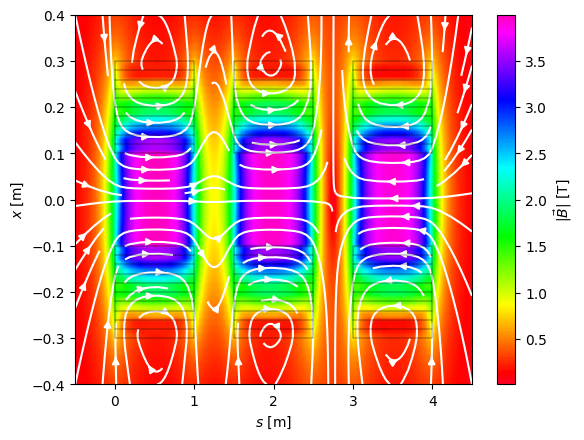

In [12]:
#vector fieldplot
plt.streamplot(s,rho_,Bz,Bx, density=1., linewidth=None, color='w') 

#color map of the total field 
B_tot = np.sqrt(Bz**2 + Bx**2 + By**2)
myextent = [s[0] ,s[-1], rho_[0], rho_[-1]]
plt.imshow(B_tot , origin='lower', extent=myextent,cmap='gist_rainbow', aspect='auto')
plt.colorbar(label=r'$|\vec{B}|$ [T]')

plt.xlabel(r'$s$ [m]')
plt.ylabel(r'$x$ [m]')
plt.ylim(rho_[0],rho_[-1])
plt.xlim(s[0],s[-1])

#Bonus: solenoid sheets (just for illustrative purposes!)
for sol in solenoid_list:
    pos = sol.position
    L = sol.L_sol
    rin = sol.radius_inner
    rout = sol.radius_outer
    n = sol.nSheet
    dt = (rout - rin) / n
    x_left  = pos - 0.5 * L
    x_right = pos + 0.5 * L
    # Radii of sheets
    r_vals = [rin + i * dt for i in range(n + 1)]
    # Horizontal sheets
    for r in r_vals:
        # upper
        plt.plot([x_left, x_right], [ r,  r], color='k', lw=0.3)
        # lower
        plt.plot([x_left, x_right], [-r, -r], color='k', lw=0.3)
    # Vertical connections (edges)
    for r1, r2 in zip(r_vals[:-1], r_vals[1:]):
        # left side
        plt.plot([x_left, x_left], [ r1,  r2], color='k', lw=0.3)
        plt.plot([x_left, x_left], [-r1, -r2], color='k', lw=0.3)
        # right side
        plt.plot([x_right, x_right], [ r1,  r2], color='k', lw=0.3)
        plt.plot([x_right, x_right], [-r1, -r2], color='k', lw=0.3)